In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows to verify data loading
df.head()


,Unnamed_0,Sector,Last_page,Have_you_smoked_at_least_one_full_tobacco_cigarette_excluding_ecigarettes_once_or_more_in_the_past_30_days,I_see_myself_as_someone_who_is_extraverted_enthusiastic,I_see_myself_as_someone_who_is_critical_quarrelsome,I_see_myself_as_someone_who_is_dependable_selfdisciplined,I_see_myself_as_someone_who_is_anxious_easily_upset,I_see_myself_as_someone_who_is_open_to_new_experiences,I_see_myself_as_someone_who_is_reserved_quiet,...,What_is_your_main_source_of_income,What_type_of_income_or_financial_support_does_your_household_receive,If_you_receive_payment_in_Lebanese_Lira_what_is_your_current_estimated_monthly_household_income_If_income_is_in_US_Dollars_then_refer_to_the_current_black_market_exchange,How_would_you_describe_your_current_income_sufficiency,Including_yourself_how_many_people_currently_live_in_your_household,To_what_extent_were_you_financially_negatively_affected_by_the_deterioration_of_the_Lebanese_economy,How_often_do_you_exercise,On_average_how_many_hours_per_day_do_you_spend_on_social_media_for_entertainment_and_social_interaction_Facebook_Instagram_YouTube_etc,How_often_do_you_feel_stressed,Employment_Status
0,5,private,5,yes,agree strongly,disagree moderately,agree strongly,agree moderately,agree strongly,agree a little,...,own business income,fully in lebanese lira,more than 20 million l.l,high: completely covers necessities with a few...,4,very,never,between 2 and 3 hours,frequently,employed
1,11,private,5,yes,agree moderately,agree moderately,agree moderately,agree a little,agree strongly,disagree strongly,...,parents,fully in us dollars,more than 20 million l.l,high: completely covers necessities with a few...,4,slightly,often or at least 3 days every week,between 2 and 3 hours,occasionally,unemployed
2,14,private,5,yes,disagree moderately,neither agree nor disagree,agree a little,agree moderately,disagree a little,agree moderately,...,parents,fully in lebanese lira,i don't know,high: completely covers necessities with a few...,4,moderately,every day or at least 5 times every week,more than 4 hours,constantly,employed
3,15,private,5,yes,agree strongly,disagree moderately,agree strongly,disagree strongly,agree strongly,disagree moderately,...,parents,mixed,i don't know,medium: covers all basic needs,5,moderately,often or at least 3 days every week,between 2 and 3 hours,occasionally,employed
4,16,private,5,yes,agree a little,agree a little,agree strongly,disagree moderately,agree moderately,agree strongly,...,investment,"other, please specify",i prefer not to say,medium: covers all basic needs,6,slightly,every day or at least 5 times every week,less than 1 hour,never,employed


### Step 1: Compute and Visualize Correlations
Here, we will:
1. Compute the correlation matrix for numeric variables in the dataset using the `.corr()` method.
2. Visualize the correlation matrix as a heatmap using `seaborn.heatmap`.
   - The heatmap will display the strength of relationships between variables.
   - High positive correlations (close to 1) are shown in red, while strong negative correlations (close to -1) are shown in blue.


### Step 1: Import Libraries and Load Data
In this step, we:
1. Import the required libraries (`pandas`, `seaborn`, `matplotlib`, etc.).
2. Load the cleaned dataset for correlation analysis.
3. Display the first few rows to verify the data structure.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows to verify data loading
df_cleaned.head()


,Unnamed_0,Sector,Last_page,Have_you_smoked_at_least_one_full_tobacco_cigarette_excluding_ecigarettes_once_or_more_in_the_past_30_days,I_see_myself_as_someone_who_is_extraverted_enthusiastic,I_see_myself_as_someone_who_is_critical_quarrelsome,I_see_myself_as_someone_who_is_dependable_selfdisciplined,I_see_myself_as_someone_who_is_anxious_easily_upset,I_see_myself_as_someone_who_is_open_to_new_experiences,I_see_myself_as_someone_who_is_reserved_quiet,...,What_is_your_main_source_of_income,What_type_of_income_or_financial_support_does_your_household_receive,If_you_receive_payment_in_Lebanese_Lira_what_is_your_current_estimated_monthly_household_income_If_income_is_in_US_Dollars_then_refer_to_the_current_black_market_exchange,How_would_you_describe_your_current_income_sufficiency,Including_yourself_how_many_people_currently_live_in_your_household,To_what_extent_were_you_financially_negatively_affected_by_the_deterioration_of_the_Lebanese_economy,How_often_do_you_exercise,On_average_how_many_hours_per_day_do_you_spend_on_social_media_for_entertainment_and_social_interaction_Facebook_Instagram_YouTube_etc,How_often_do_you_feel_stressed,Employment_Status
0,5,private,5,yes,agree strongly,disagree moderately,agree strongly,agree moderately,agree strongly,agree a little,...,own business income,fully in lebanese lira,more than 20 million l.l,high: completely covers necessities with a few...,4,very,never,between 2 and 3 hours,frequently,employed
1,11,private,5,yes,agree moderately,agree moderately,agree moderately,agree a little,agree strongly,disagree strongly,...,parents,fully in us dollars,more than 20 million l.l,high: completely covers necessities with a few...,4,slightly,often or at least 3 days every week,between 2 and 3 hours,occasionally,unemployed
2,14,private,5,yes,disagree moderately,neither agree nor disagree,agree a little,agree moderately,disagree a little,agree moderately,...,parents,fully in lebanese lira,i don't know,high: completely covers necessities with a few...,4,moderately,every day or at least 5 times every week,more than 4 hours,constantly,employed
3,15,private,5,yes,agree strongly,disagree moderately,agree strongly,disagree strongly,agree strongly,disagree moderately,...,parents,mixed,i don't know,medium: covers all basic needs,5,moderately,often or at least 3 days every week,between 2 and 3 hours,occasionally,employed
4,16,private,5,yes,agree a little,agree a little,agree strongly,disagree moderately,agree moderately,agree strongly,...,investment,"other, please specify",i prefer not to say,medium: covers all basic needs,6,slightly,every day or at least 5 times every week,less than 1 hour,never,employed


### Step 2: Define Helper Functions for Mixed Correlation
Since the dataset contains both numerical and categorical data, we:
1. Define a function to compute Cramér's V for categorical data.
2. Define a function to compute a correlation matrix for both numerical and categorical features.


In [6]:
# Function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    contingency_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_matrix.shape
    return np.sqrt(phi2 / min((k - 1), (r - 1)))

# Function to compute correlation matrix for all variables (numeric + categorical)
def compute_mixed_correlation(df):
    columns = df.columns
    correlation_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                correlation_matrix.loc[col1, col2] = 1.0
            elif df[col1].dtype in ['int64', 'float64'] and df[col2].dtype in ['int64', 'float64']:
                # Numeric correlation
                correlation_matrix.loc[col1, col2] = df[col1].corr(df[col2])
            else:
                # Categorical or mixed correlation
                correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    return correlation_matrix


### Step 3: Encode Categorical Variables
1. Categorical variables are label-encoded to convert them into numeric form.
2. This allows us to compute correlations even for non-numerical features.


In [7]:
# Encode categorical variables into numerical format for correlation computation
df_encoded = df_cleaned.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


### Step 4: Compute and Visualize Correlations
1. Compute the mixed correlation matrix using the helper function.
2. Visualize the correlation matrix using a heatmap.
3. Highlight strong correlations (e.g., above 0.5) for further analysis.


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


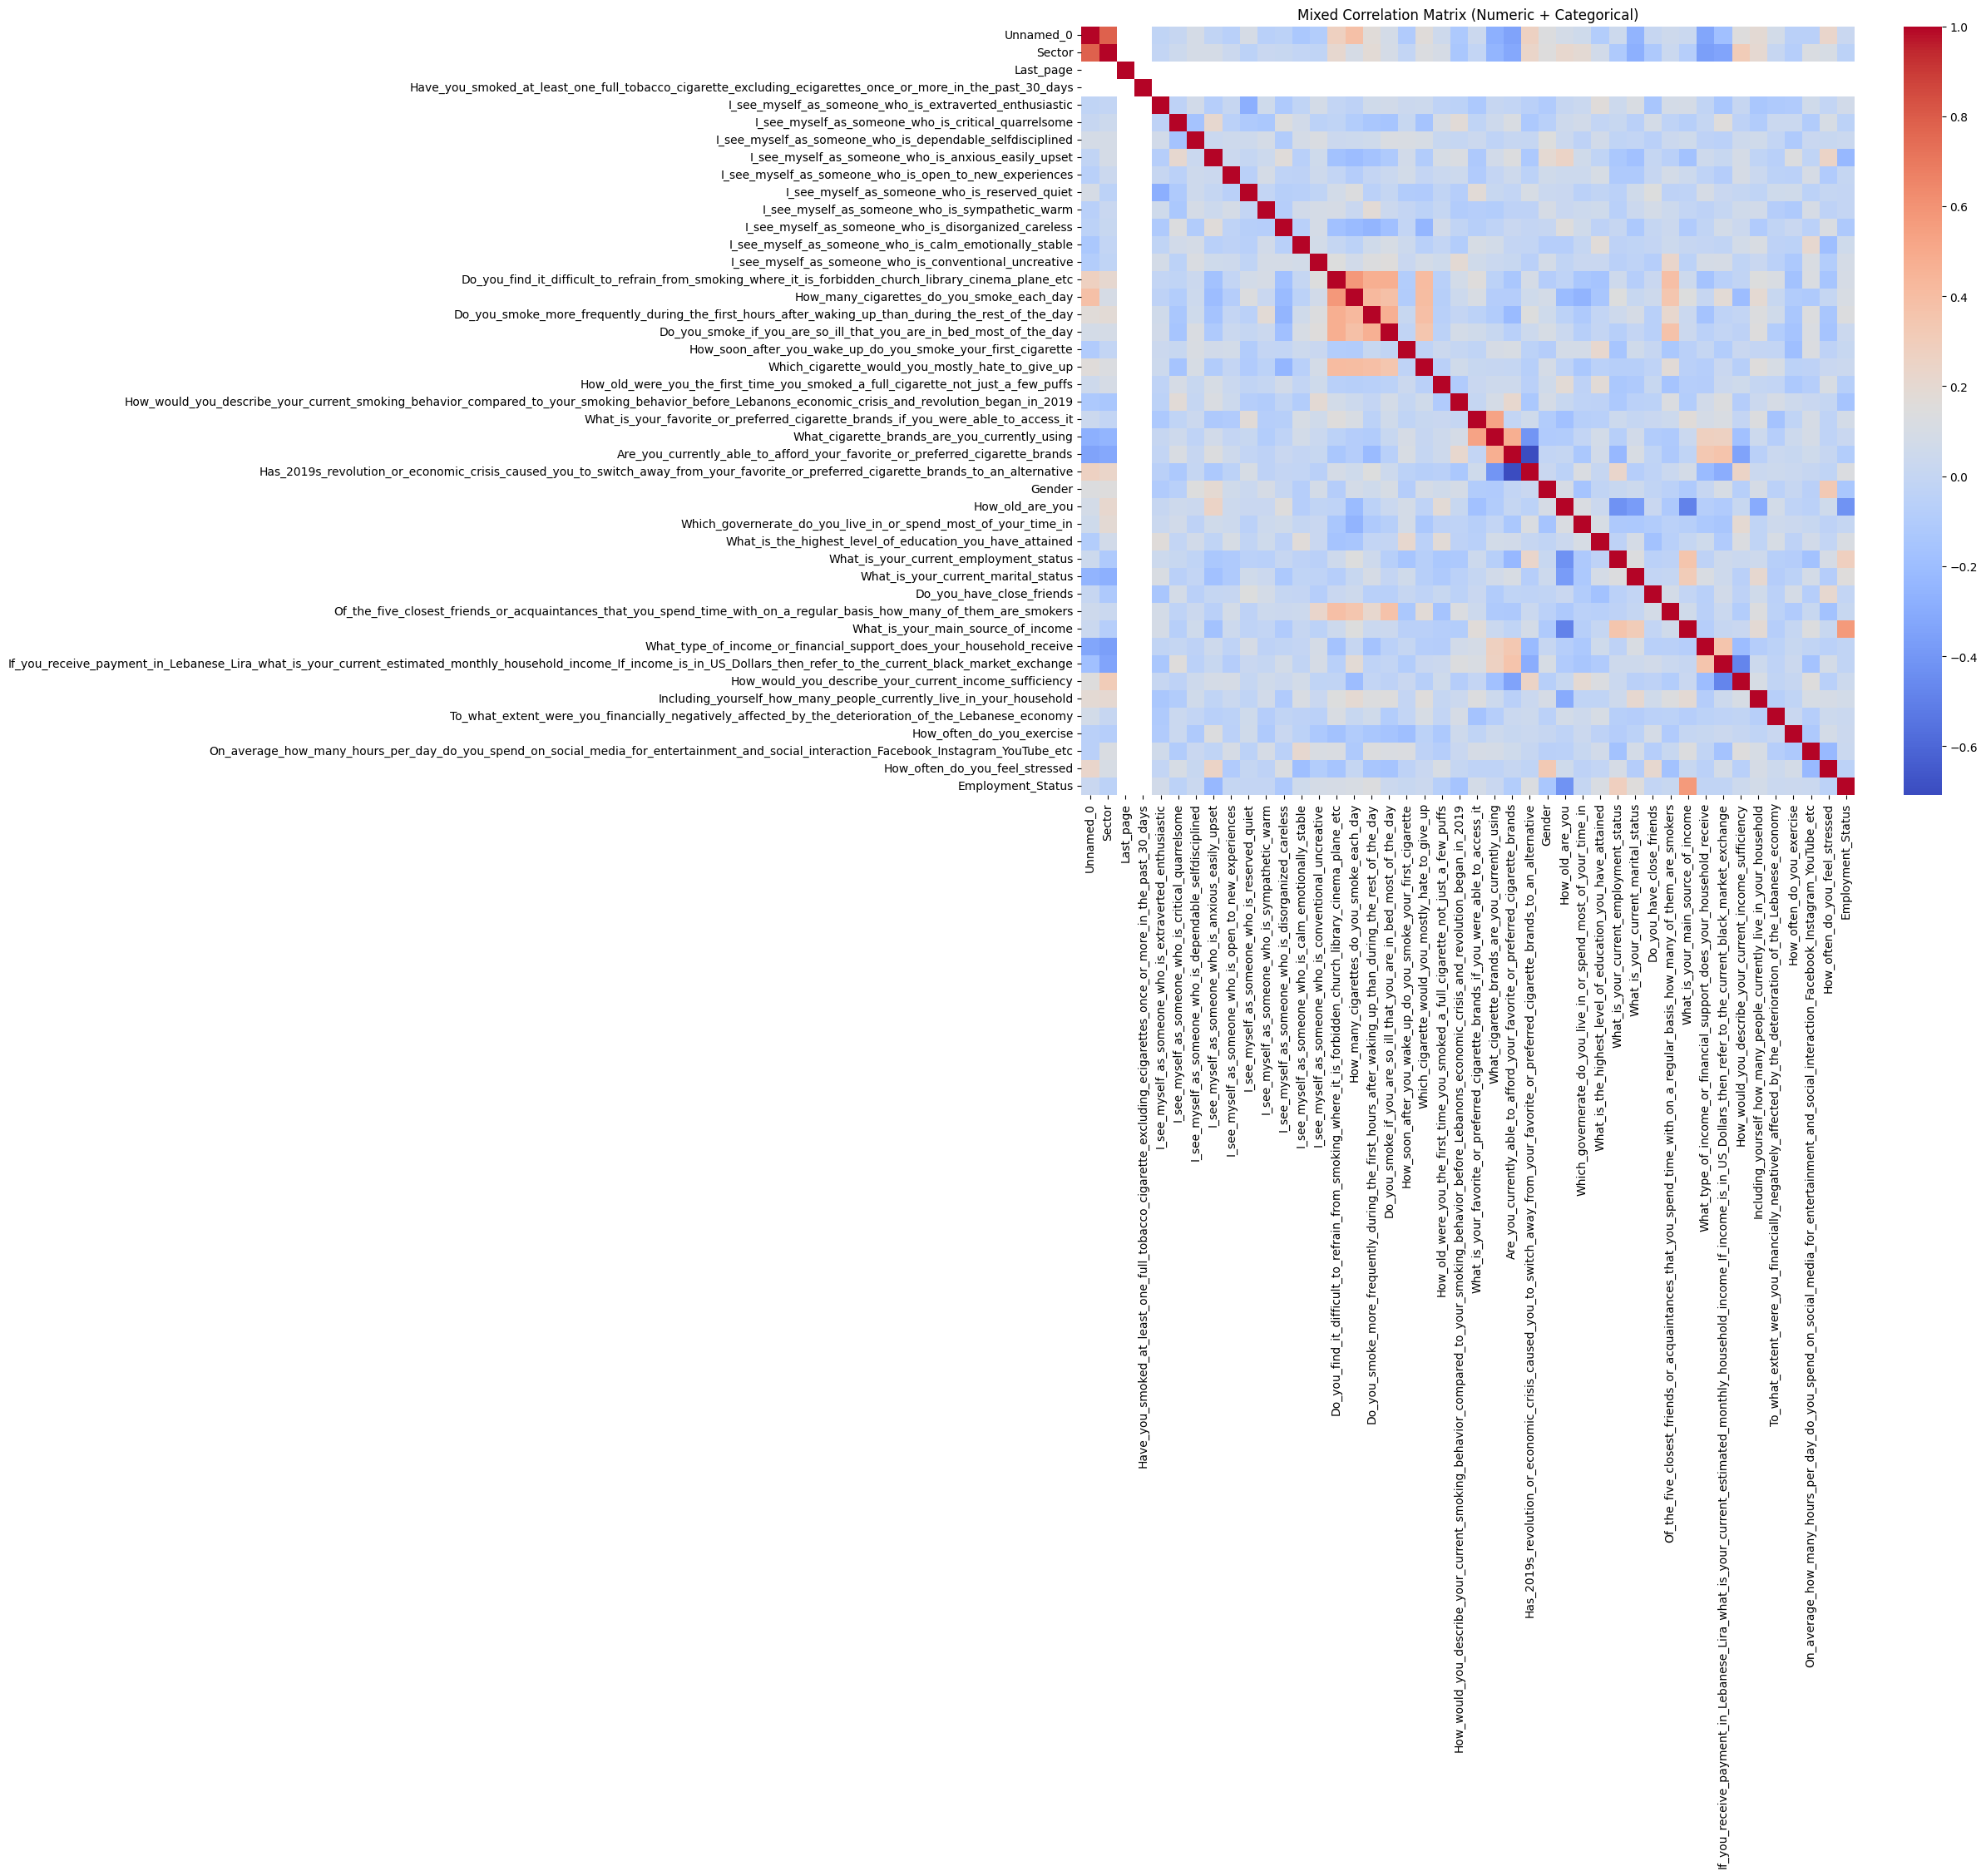

Top Strong Correlations:
Sector                                                                                                  Unnamed_0                                                                                                 0.780203
Unnamed_0                                                                                               Sector                                                                                                    0.780203
Do_you_find_it_difficult_to_refrain_from_smoking_where_it_is_forbidden_church_library_cinema_plane_etc  How_many_cigarettes_do_you_smoke_each_day                                                                 0.576611
How_many_cigarettes_do_you_smoke_each_day                                                               Do_you_find_it_difficult_to_refrain_from_smoking_where_it_is_forbidden_church_library_cinema_plane_etc    0.576611
What_is_your_main_source_of_income                                                                 

In [11]:
# Compute the correlation matrix
correlation_matrix = compute_mixed_correlation(df_encoded)

# Visualize the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Mixed Correlation Matrix (Numeric + Categorical)')
plt.show()

# Identify and display strong correlations
strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
strong_correlations_filtered = strong_correlations[(strong_correlations < 1) & (strong_correlations > 0.5)]

# Display top 10 strong correlations
print("Top Strong Correlations:")
print(strong_correlations_filtered.head(20))


##What might be the goals for this data?
*in what ways I can use the data provided ?*

#### **1. Classification Goals**
- Predict employment status (e.g., employed or unemployed) based on demographics and financial data.
- Determine smoking habits (e.g., frequent smoker or non-smoker) based on personality and lifestyle.
- Classify stress levels (e.g., low, medium, high) using habits and social behavior.
- Identify individuals highly affected by the economic crisis.

#### **2. Regression Goals**
- Predict monthly household income based on demographic and employment data.
- Estimate the number of cigarettes smoked per day from psychological traits and habits.
- Forecast stress levels or time spent on social media based on lifestyle factors.

#### **3. Clustering Goals**
- Group individuals by smoking behavior, stress patterns, or economic dependency.
- Segment individuals based on personality traits and their lifestyle habits.

#### **4. Exploratory Analysis Goals**
- Analyze correlations between stress and smoking habits.
- Examine the impact of exercise on stress levels.
- Understand how the economic crisis affects income sufficiency and lifestyle.

#### **5. Recommendation System Goals**
- Recommend smoking cessation programs tailored to behavioral patterns.
- Suggest exercise routines to reduce stress based on personality traits.
- Provide financial management recommendations based on income data.

#### **6. Behavioral Analysis Goals**
- Analyze links between personality traits and smoking habits.
- Investigate the effect of income levels on lifestyle choices like exercise or smoking.
- Explore how social media usage correlates with stress and productivity.

#### **7. Causal Inference Goals**
- Does stress increase smoking, or does smoking temporarily alleviate stress?
- How does income sufficiency affect psychological well-being and habits?

#### **8. Policy and Intervention Goals**
- Design public health interventions for smoking cessation.
- Recommend mental health support for individuals with high stress and low exercise.
- Provide policymakers with insights into the economic impact on citizens' lifestyles.

#### **9. Predictive Analytics Goals**
- Forecast changes in smoking habits during economic crises.
- Predict future stress levels or income sufficiency trends based on lifestyle adjustments.
